# Weekly Analysis of California Covid-19 Cases
- From July 2020 to September 2020 cases and deaths rise steadily. 
    - The total number of cases ranges from 2.07 million to 5.60 million.
    - The total number of deaths ranges from 0.047 million to 0.11 million.
    - The weekly average number of cases ranges from 0.30 million to 0.80 million.
    - The weekly average number of deaths ranges from 0.0067 million to 0.015 million.
- From October 2020 to December 2020 cases and deaths rise over time with a steep increase starting the week of November 7th up to January 30th.
    - The total number of cases ranges from 5.75 million to 14.05 million.
        - The total number of cases the week of November 7th was 7.01 million, the rise in cases changes from 500,000 between November 7th to November 14th, to a rise of 2.0 million between December 12th and December 19th.
    - The total number of deaths ranges from 0.11 million to 0.16 million.
        - The total number of deaths the week of November 7th was 0.13 million, the rise in deaths changes from 2,500 between November 7th to November 14th, to a rise of 12,000 between December 12th and December 19th.
    - The weekly average number of cases ranges from 0.82 million to 2.01 million.
        - The weekly average number of casees the week of November 7th was 1.00 million, the rise in average cases changes from 69,000 between November 7th to November 14th, to a rise of 290,000 between December 12th and December 19th.
    - The weekly average number of deaths ranges from 0.016 million to 0.024 million.
        - The weekly average number of deaths the week of November 7th was 0.018 million, the rise in average cases changes from 358 cases between November 7th to November 14th, to a rise of 1,700 between December 12th and December 19th.
- From January 2021 to March 2021 cases and deaths the cases rise steadily and plateau the week of January 30th, the deaths rise steadily the entire trimester.
    - The total number of cases ranges from 15.9 million to 25.6 million.
    - The total number of deaths ranges from 0.18 million to 0.41 million.
    - The average number of cases ranges from 2.28 million to 3.65 million.
    - The average number of deaths ranges from 0.025 million to 0.058 million.

- From April 2021 to June 2021 deaths and cases rise steadily, deaths dip slightly between the week of May 29th and June but rise after.
    - The total number of cases ranges from 25.69 million to 26.69 million.
    - The total number of deaths ranges from 0.41 million to 0.44 million.
    - The average number of cases ranges from 3.67 million to 3.81 million.
    - The average number fo deaths ranges from 0.059 million to 0.063 million.

In [1]:
#dependencies and setup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#load data file
data = "C:/Users/geral/OneDrive/Documents/GitHub/Project-1-/ca_data_jul20-jul21.csv"

#read data file and store in dataframe
covid_data = pd.read_csv(data)
covid_data

,date,county,state,cases,deaths
0,2020-07-01,Alameda,California,6177,136.0
1,2020-07-01,Alpine,California,1,0.0
2,2020-07-01,Amador,California,22,0.0
3,2020-07-01,Butte,California,189,2.0
4,2020-07-01,Calaveras,California,40,0.0
...,...,...,...,...,...
21136,2021-06-30,Trinity,California,342,3.0
21137,2021-06-30,Tulare,California,49896,852.0
21138,2021-06-30,Tuolumne,California,4242,71.0
21139,2021-06-30,Ventura,California,81884,1032.0


In [2]:
#create new dataframe and drop county column
daily = covid_data

daily = daily.drop('county', axis = 1)

daily

,date,state,cases,deaths
0,2020-07-01,California,6177,136.0
1,2020-07-01,California,1,0.0
2,2020-07-01,California,22,0.0
3,2020-07-01,California,189,2.0
4,2020-07-01,California,40,0.0
...,...,...,...,...
21136,2021-06-30,California,342,3.0
21137,2021-06-30,California,49896,852.0
21138,2021-06-30,California,4242,71.0
21139,2021-06-30,California,81884,1032.0


In [3]:
#group by date and sum the value to obtain the total number of cases and deaths in California any given day
daily = daily.groupby('date').sum()

daily

,cases,deaths
date,,
2020-07-01,239764,6168.0
2020-07-02,248198,6263.0
2020-07-03,256298,6315.0
2020-07-04,265176,6329.0
2020-07-05,271587,6369.0
...,...,...
2021-06-26,3815178,63555.0
2021-06-27,3816045,63586.0
2021-06-28,3817655,63597.0


In [4]:
#the first day included is Wednesday, which will be day 4 of the week if we are looking at the week Sun-Sat, se we start at 3 so that the count starts at 4 when iterating through the rows
day_of_week = 3
#start at week number 1
week_number = 1

#iterate through dataframe rows
for index, row in daily.iterrows():
    #if the day of the week is less than 7, add 1 to the counter
    if day_of_week <7:
        day_of_week += 1
        #enter the day of the week and the week number in the dataframe
        daily.loc[index, 'Week'] = week_number
        daily.loc[index, 'Weekday'] = day_of_week
    #if the day of the week is equal to 7 reset to 1, and add 1 to the week number counter
    elif day_of_week == 7:
        day_of_week = 1
        week_number += 1
        #enter the day of the week and the week number in the dataframe
        daily.loc[index, 'Week'] = week_number
        daily.loc[index, 'Weekday'] = day_of_week
    else:
        print('Error')

daily

,cases,deaths,Week,Weekday
date,,,,
2020-07-01,239764,6168.0,1.0,4.0
2020-07-02,248198,6263.0,1.0,5.0
2020-07-03,256298,6315.0,1.0,6.0
2020-07-04,265176,6329.0,1.0,7.0
2020-07-05,271587,6369.0,2.0,1.0
...,...,...,...,...
2021-06-26,3815178,63555.0,52.0,7.0
2021-06-27,3816045,63586.0,53.0,1.0
2021-06-28,3817655,63597.0,53.0,2.0


In [5]:
#create new dataframe that groups the rows by week and add values in all other rows
weekly_cases = daily.groupby('Week').sum()

weekly_cases

,cases,deaths,Weekday
Week,,,
1.0,1009436,25075.0,22.0
2.0,2068577,46865.0,28.0
3.0,2488849,51517.0,28.0
4.0,2954147,56338.0,28.0
5.0,3393480,62191.0,28.0
6.0,3743519,68971.0,28.0
7.0,4157122,75657.0,28.0
8.0,4529457,81710.0,28.0
9.0,4809967,87796.0,28.0


In [6]:
#check that the Week column is the index
weekly_cases.index

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
              23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0,
              34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0,
              45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0],
             dtype='float64', name='Week')

In [7]:
#divide the cases and deaths by 7 to obtain the weekly case average and the weekly death average
weekly_cases['case average'] = weekly_cases['cases'].loc[:].div(7).round()
weekly_cases['death average'] = weekly_cases['deaths'].loc[:].div(7).round()

weekly_cases

,cases,deaths,Weekday,case average,death average
Week,,,,,
1.0,1009436,25075.0,22.0,144205.0,3582.0
2.0,2068577,46865.0,28.0,295511.0,6695.0
3.0,2488849,51517.0,28.0,355550.0,7360.0
4.0,2954147,56338.0,28.0,422021.0,8048.0
5.0,3393480,62191.0,28.0,484783.0,8884.0
6.0,3743519,68971.0,28.0,534788.0,9853.0
7.0,4157122,75657.0,28.0,593875.0,10808.0
8.0,4529457,81710.0,28.0,647065.0,11673.0
9.0,4809967,87796.0,28.0,687138.0,12542.0


In [8]:
#keep only the rows that contain '28' in the weekday column (1+2+3+4+5+6+7 = 28), these are the rows with a full week
weekly_cases = weekly_cases[weekly_cases.Weekday == 28]
#drop the weekday column
weekly_cases = weekly_cases.drop('Weekday', axis=1)

weekly_cases

,cases,deaths,case average,death average
Week,,,,
2.0,2068577,46865.0,295511.0,6695.0
3.0,2488849,51517.0,355550.0,7360.0
4.0,2954147,56338.0,422021.0,8048.0
5.0,3393480,62191.0,484783.0,8884.0
6.0,3743519,68971.0,534788.0,9853.0
7.0,4157122,75657.0,593875.0,10808.0
8.0,4529457,81710.0,647065.0,11673.0
9.0,4809967,87796.0,687138.0,12542.0
10.0,5054969,93287.0,722138.0,13327.0


In [9]:
#divide the dataframe into trimesters, first group contains July 2020 to September 2020
weekly_cases1 = weekly_cases[:13]

weekly_cases1

,cases,deaths,case average,death average
Week,,,,
2.0,2068577,46865.0,295511.0,6695.0
3.0,2488849,51517.0,355550.0,7360.0
4.0,2954147,56338.0,422021.0,8048.0
5.0,3393480,62191.0,484783.0,8884.0
6.0,3743519,68971.0,534788.0,9853.0
7.0,4157122,75657.0,593875.0,10808.0
8.0,4529457,81710.0,647065.0,11673.0
9.0,4809967,87796.0,687138.0,12542.0
10.0,5054969,93287.0,722138.0,13327.0


In [10]:
#divide the dataframe into trimesters, second group contains October 2020 to December 2020
weekly_cases2 = weekly_cases[14:26]

weekly_cases2

,cases,deaths,case average,death average
Week,,,,
14.0,5749729,111123.0,821390.0,15875.0
15.0,5909333,114433.0,844190.0,16348.0
16.0,6068485,117257.0,866926.0,16751.0
17.0,6243709,120149.0,891958.0,17164.0
18.0,6458387,122630.0,922627.0,17519.0
19.0,6688408,124709.0,955487.0,17816.0
20.0,7013706,126805.0,1001958.0,18115.0
21.0,7500066,129309.0,1071438.0,18473.0
22.0,8150923,132608.0,1164418.0,18944.0


In [11]:
#divide the dataframe into trimesters, third group contains January 2021 to March 2021
weekly_cases3 = weekly_cases[27:39]

weekly_cases3

,cases,deaths,case average,death average
Week,,,,
27.0,15946759,177900.0,2278108.0,25414.0
28.0,17886229,196637.0,2555176.0,28091.0
29.0,19986782,221725.0,2855255.0,31675.0
30.0,21623743,245574.0,3089106.0,35082.0
31.0,22762248,272179.0,3251750.0,38883.0
32.0,23572319,297184.0,3367474.0,42455.0
33.0,24151631,318277.0,3450233.0,45468.0
34.0,24543239,335757.0,3506177.0,47965.0
35.0,24844077,354851.0,3549154.0,50693.0


In [12]:
#divide the dataframe into trimesters, fourth group contains April 2021 to June 2021
weekly_cases4 = weekly_cases[40:]

weekly_cases4

,cases,deaths,case average,death average
Week,,,,
40.0,25686342,414990.0,3669477.0,59284.0
41.0,25817273,420112.0,3688182.0,60016.0
42.0,25964404,424860.0,3709201.0,60694.0
43.0,26076684,428474.0,3725241.0,61211.0
44.0,26167685,431282.0,3738241.0,61612.0
45.0,26260347,434616.0,3751478.0,62088.0
46.0,26344785,437319.0,3763541.0,62474.0
47.0,26410981,439436.0,3772997.0,62777.0
48.0,26481449,441482.0,3783064.0,63069.0


C:\Users\geral\AppData\Local\Temp\ipykernel_55772\1506431550.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


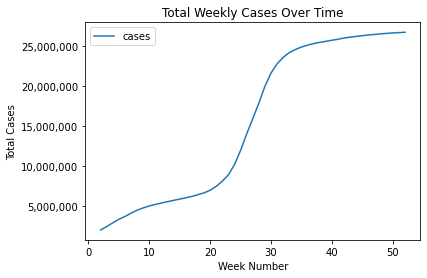

In [13]:
#July 2020 to June 2021
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases.plot(y=['cases'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Cases Over Time')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Cases')
#save image
plt.savefig('Total_cases.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\1736469259.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


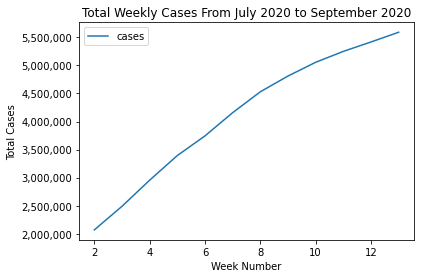

In [14]:
#First quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases1.plot(y=['cases'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Cases From July 2020 to September 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Cases')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\2600930165.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


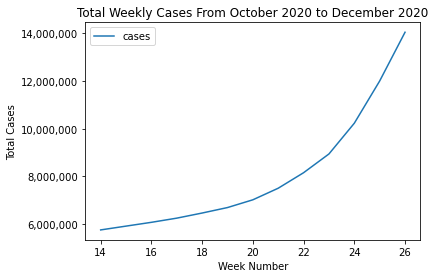

In [15]:
#Second quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases2.plot(y=['cases'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Cases From October 2020 to December 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Cases')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\866016652.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


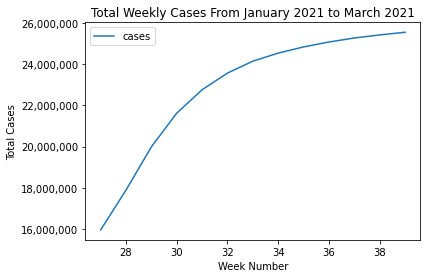

In [16]:
#Third quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases3.plot(y=['cases'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Cases From January 2021 to March 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Cases')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\831265076.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


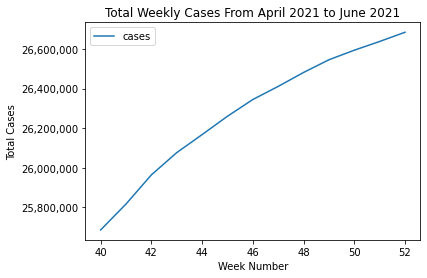

In [17]:
#Fourth quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases4.plot(y=['cases'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Cases From April 2021 to June 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Cases')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\1405124081.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


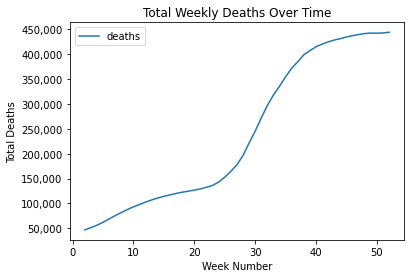

In [18]:
#July 2020 to June 2021
#create a line graph with the index in the x-axis and the deaths in the y-axis
weekly_cases.plot(y=['deaths'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Deaths Over Time')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Deaths')
plt.savefig('Total_deaths.png', facecolor='white')
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\527279281.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


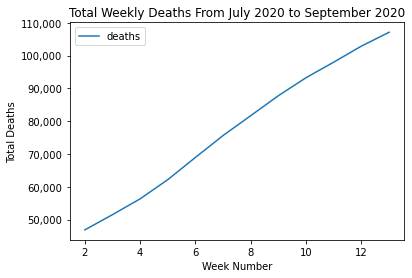

In [19]:
#First quarter
#create a line graph with the index in the x-axis and the deaths in the y-axis
weekly_cases1.plot(y=['deaths'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Deaths From July 2020 to September 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Deaths')
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\2099027185.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


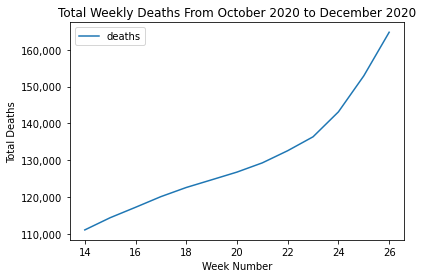

In [20]:
#Second quarter
#create a line graph with the index in the x-axis and the deaths in the y-axis
weekly_cases2.plot(y=['deaths'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Deaths From October 2020 to December 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Deaths')
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\832925145.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


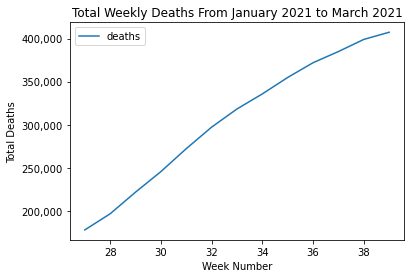

In [21]:
#Third quarter
#create a line graph with the index in the x-axis and the deaths in the y-axis
weekly_cases3.plot(y=['deaths'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Deaths From January 2021 to March 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Deaths')
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\3019520805.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


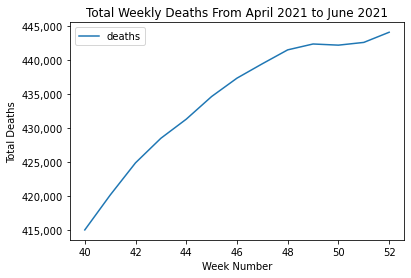

In [22]:
#Fourth quarter
#create a line graph with the index in the x-axis and the deaths in the y-axis
weekly_cases4.plot(y=['deaths'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Total Weekly Deaths From April 2021 to June 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Total Deaths')
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\1146482055.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


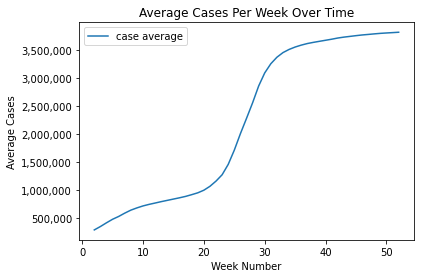

In [23]:
#July 2020 to June 2021
#create a line graph with the index in the x-axis and the case average in the y-axis
weekly_cases.plot(y=['case average'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Cases Per Week Over Time')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Cases')
plt.savefig('Average_cases.png', facecolor='white')
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\619773963.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


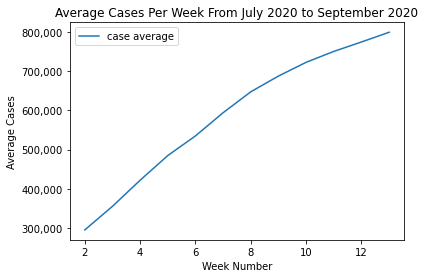

In [24]:
#First quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases1.plot(y=['case average'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Cases Per Week From July 2020 to September 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Cases')

plt.savefig('Average_cases_Q1.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\1128477269.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


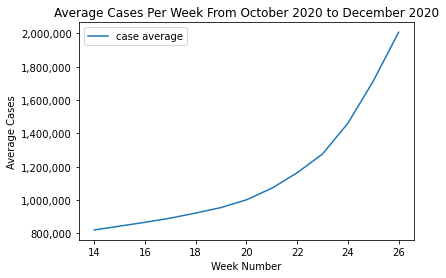

In [25]:
#Second quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases2.plot(y=['case average'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Cases Per Week From October 2020 to December 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Cases')

plt.savefig('Average_cases_Q2.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\809550629.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


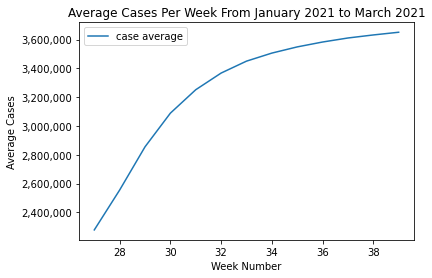

In [26]:
#Third quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases3.plot(y=['case average'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Cases Per Week From January 2021 to March 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Cases')

plt.savefig('Average_cases_Q3.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\21379215.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


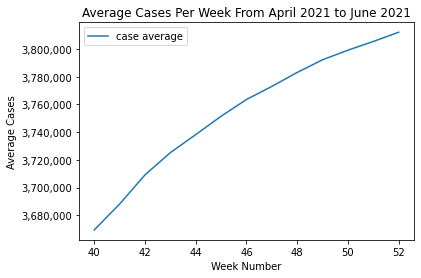

In [27]:
#Fourth quarter
#create a line graph with the index in the x-axis and the cases in the y-axis
weekly_cases4.plot(y=['case average'])
#format the y-axis ticks and values to display thousands commas (ie. 100,000)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Cases Per Week From April 2021 to June 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Cases')

plt.savefig('Average_cases_Q4.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\244253908.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


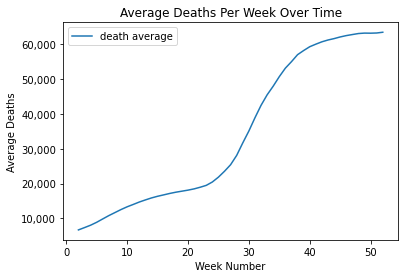

In [28]:
#July 2020 to June 2021
#create a line graph with the index in the x-axis and the death average in the y-axis
weekly_cases.plot(y=['death average'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Deaths Per Week Over Time')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Deaths')
plt.savefig('Average_deaths.png', facecolor='white')
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\2271156858.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


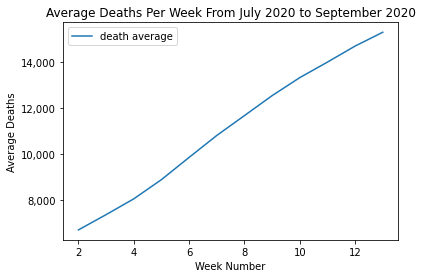

In [29]:
#First quarter
#create a line graph with the index in the x-axis and the death average in the y-axis
weekly_cases1.plot(y=['death average'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Deaths Per Week From July 2020 to September 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Deaths')

plt.savefig('Average_deaths_Q1.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\1638799504.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


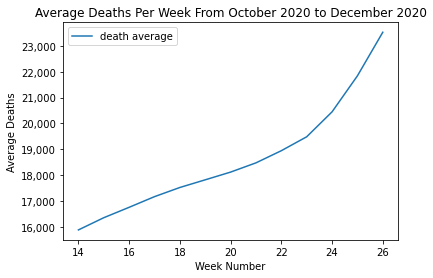

In [30]:
#Second quarter
#create a line graph with the index in the x-axis and the death average in the y-axis
weekly_cases2.plot(y=['death average'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Deaths Per Week From October 2020 to December 2020')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Deaths')

plt.savefig('Average_deaths_Q2.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\2461255811.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


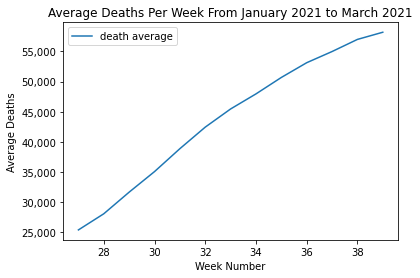

In [31]:
#Third quarter
#create a line graph with the index in the x-axis and the death average in the y-axis
weekly_cases3.plot(y=['death average'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Deaths Per Week From January 2021 to March 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Deaths')

plt.savefig('Average_deaths_Q3.png', facecolor='white')

plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_55772\4116564163.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


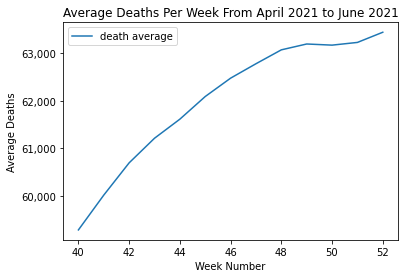

In [32]:
#Fourth quarter
#create a line graph with the index in the x-axis and the death average in the y-axis
weekly_cases4.plot(y=['death average'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#set the chart title
plt.title('Average Deaths Per Week From April 2021 to June 2021')
#set the x and y labels
plt.xlabel('Week Number')
plt.ylabel('Average Deaths')

plt.savefig('Average_deaths_Q4.png', facecolor='white')

plt.show()